In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/home/webtech/Downloads/rainfall_data.csv')
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
df.shape

(145460, 22)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

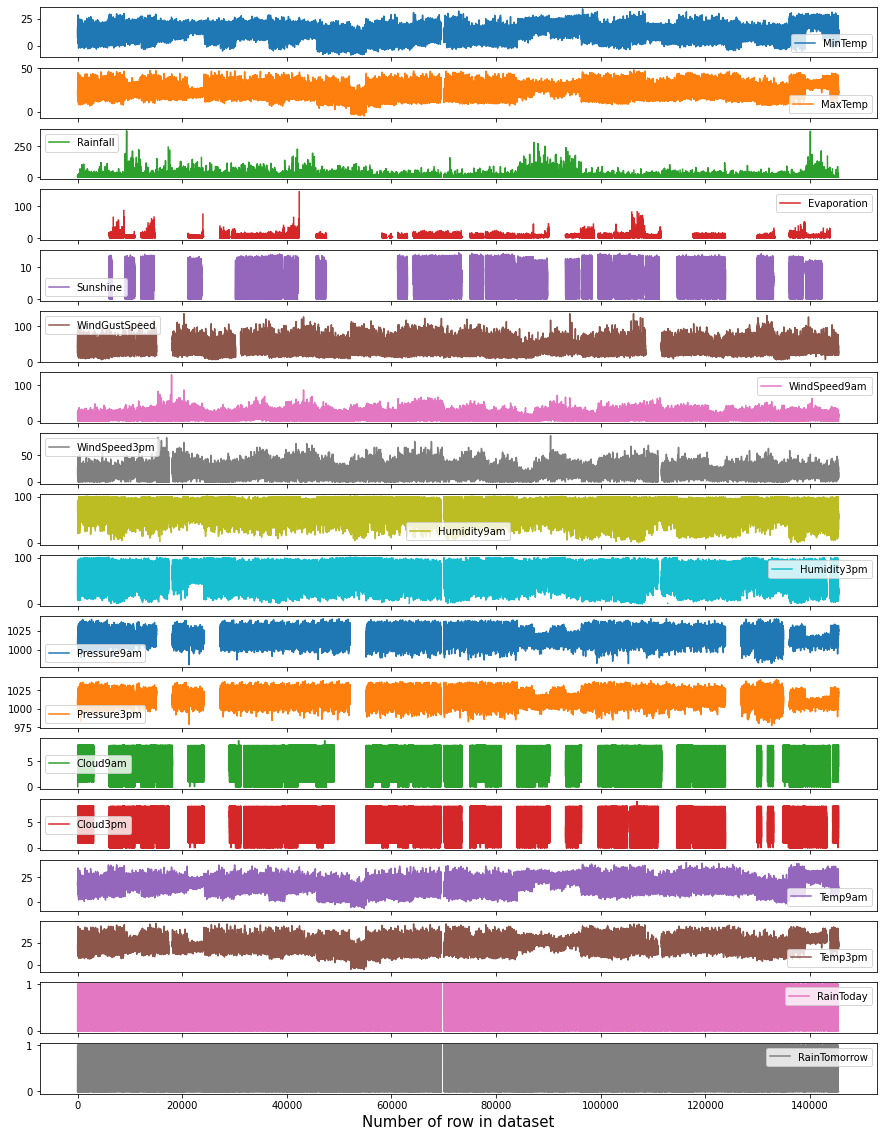

In [39]:
df.plot(legend=True,subplots=True, figsize = (15, 20))
plt.xlabel("Number of row in dataset",fontsize=15)
plt.show()

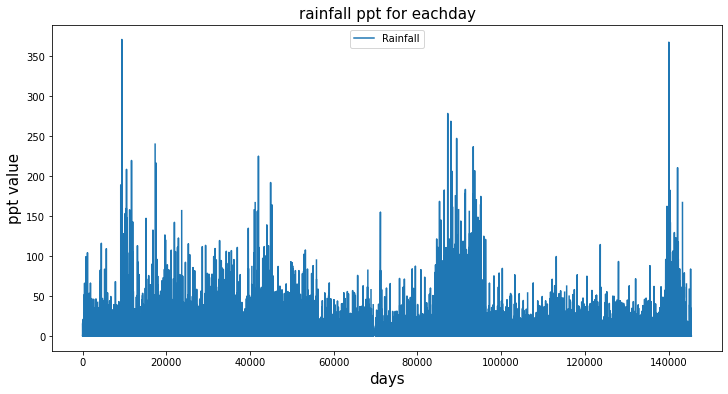

In [5]:
df['Rainfall'].plot(legend=True, figsize = (12, 6))
plt.title("rainfall ppt for eachday",fontsize = 15)
plt.xlabel("days",fontsize=15)
plt.ylabel("ppt value",fontsize=15)
plt.show()

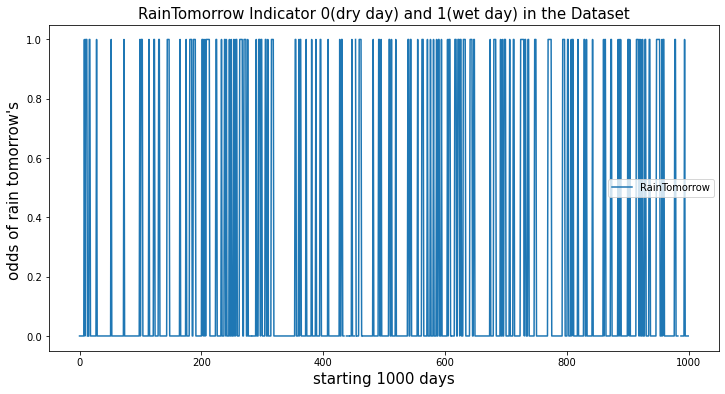

In [6]:
data = df['RainTomorrow'].replace({'No': 0, 'Yes': 1})
data[:1000].plot(legend=True, figsize = (12, 6))
plt.xlabel("starting 1000 days",fontsize=15)
plt.ylabel("odds of rain tomorrow's ",fontsize=15)
plt.title('RainTomorrow Indicator 0(dry day) and 1(wet day) in the Dataset', fontsize = 15)
plt.show()

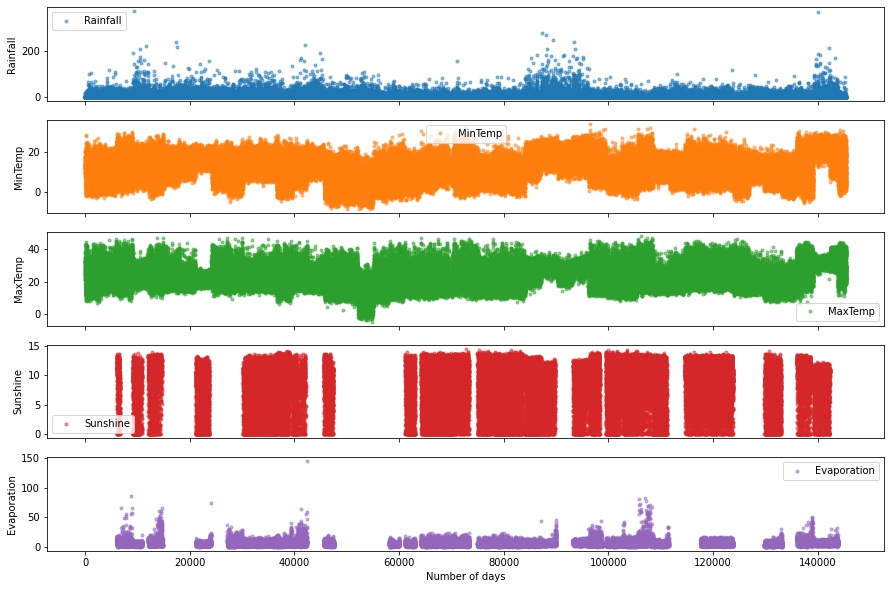

In [7]:
cols_plot = ['Rainfall', 'MinTemp', 'MaxTemp','Sunshine','Evaporation']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 10), subplots=True)
i = 0
for ax in axes:
    ax.set_ylabel(cols_plot[i])
    ax.set_xlabel('Number of days')
    i+=1

Text(0.5, 1.0, 'type of our data ')

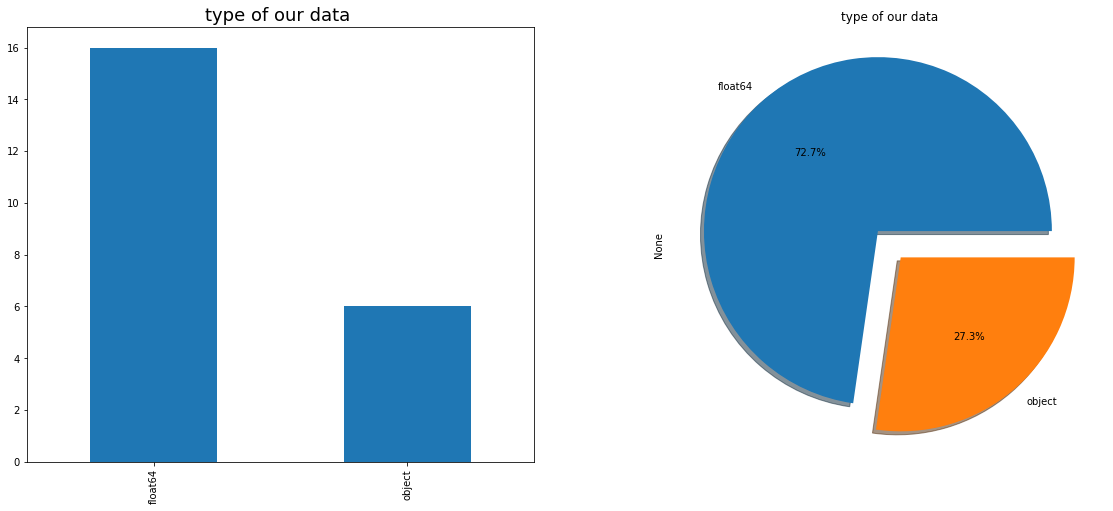

In [8]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

df.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("type of our data ", fontsize=18)

df.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('type of our data');
axarr[0].set_title("type of our data ", fontsize=18)

In [9]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

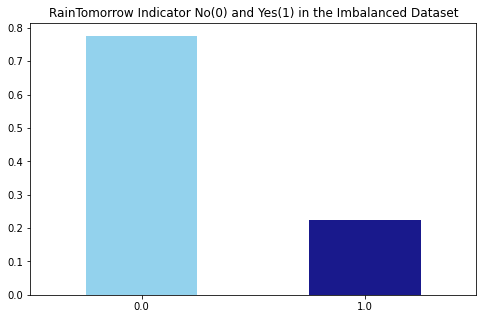

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

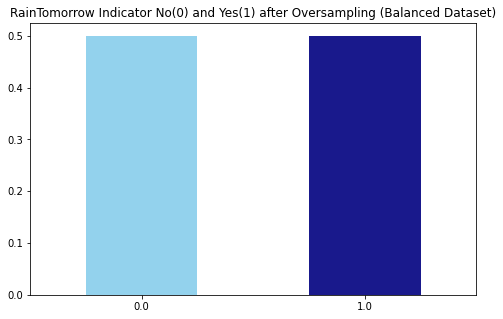

In [11]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [12]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
Date,0,0.000000,object
MinTemp,1485,1.020899,float64
MaxTemp,1261,0.866905,float64
Rainfall,3261,2.241853,float64
Evaporation,62790,43.166506,float64
Sunshine,69835,48.009762,float64
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
WindDir9am,10566,7.263853,object
WindDir3pm,4228,2.906641,object


<AxesSubplot:>

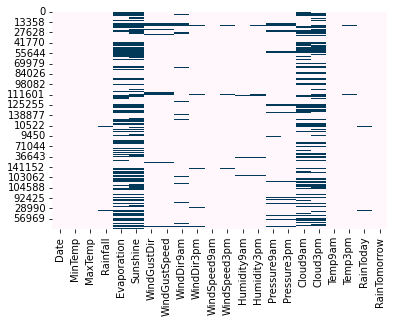

In [13]:
# Missing Data Pattern in Training Data
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [14]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664


In [15]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [16]:
# Impute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [17]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [18]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [19]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.091708
Sunshine            5.971724
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.692821
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


In [20]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(170694, 22)

<AxesSubplot:>

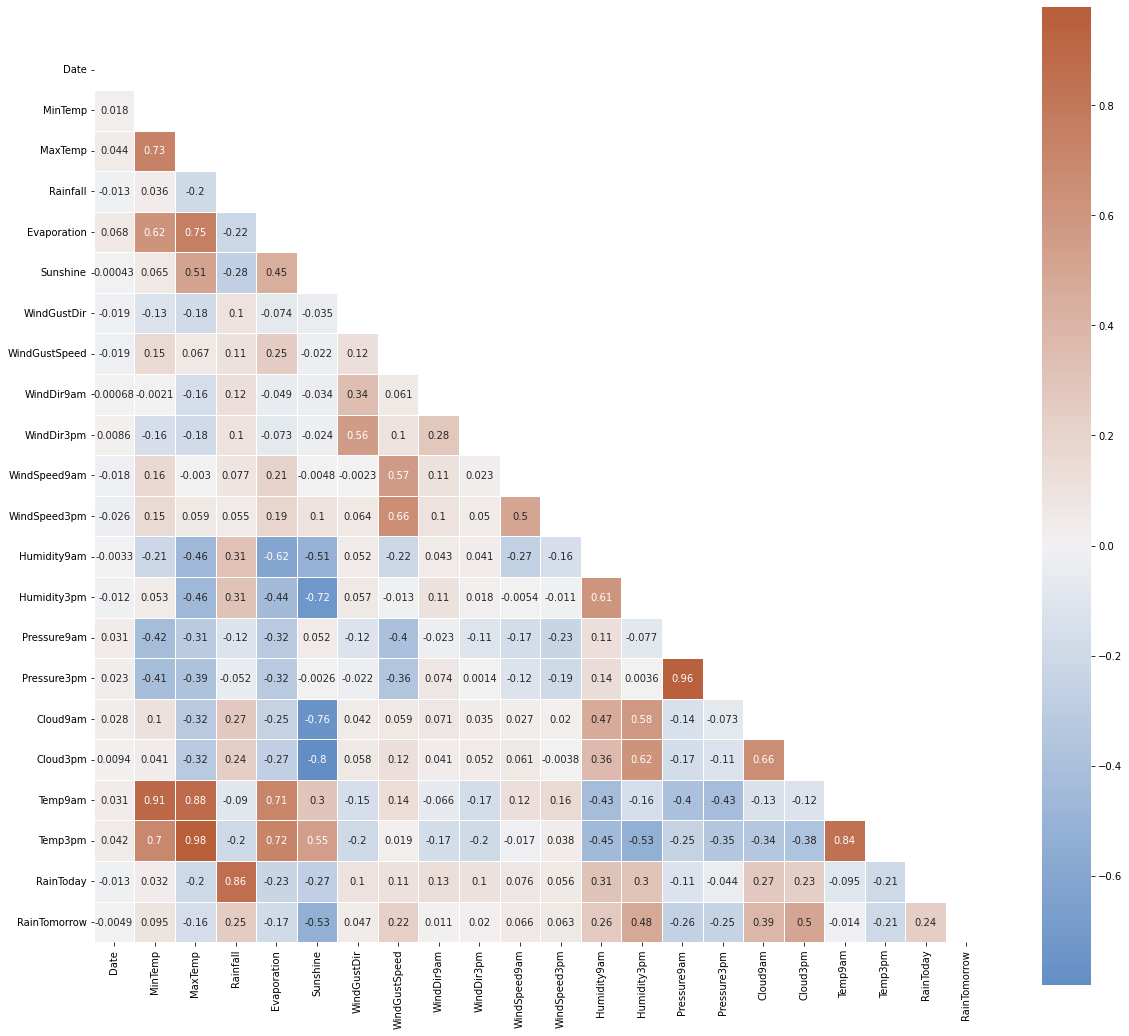

In [21]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [22]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [23]:
features = MiceImputed[[ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [25]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.7949336832731875
ROC Area under Curve = 0.7888996641231311
Cohen's Kappa = 0.581440082298095
Time taken = 1.949510097503662
              precision    recall  f1-score   support

         0.0    0.80247   0.83997   0.82079     23858
         1.0    0.78431   0.73783   0.76036     18816

    accuracy                        0.79493     42674
   macro avg    0.79339   0.78890   0.79057     42674
weighted avg    0.79446   0.79493   0.79414     42674



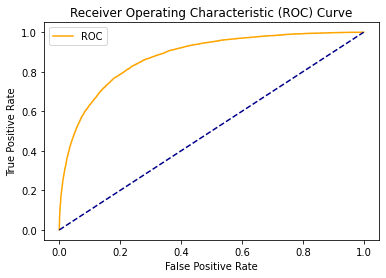

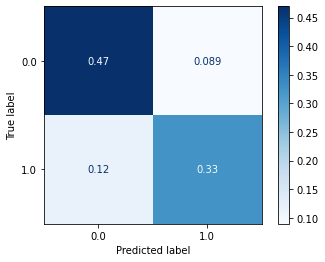

In [26]:
from sklearn.linear_model import LogisticRegression
params_lr = {'penalty': 'l1', 'solver':'liblinear'}
model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8680929840183719
ROC Area under Curve = 0.8688509057166751
Cohen's Kappa = 0.7338485404444663
Time taken = 0.4314601421356201
              precision    recall  f1-score   support

         0.0    0.89761   0.86244   0.87967     23858
         1.0    0.83383   0.87527   0.85405     18816

    accuracy                        0.86809     42674
   macro avg    0.86572   0.86885   0.86686     42674
weighted avg    0.86949   0.86809   0.86837     42674



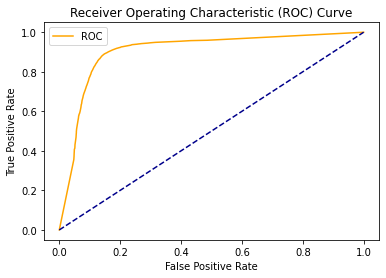

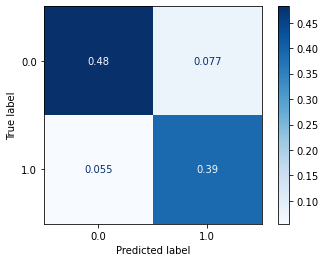

In [27]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8416131602380841
ROC Area under Curve = 0.8385256323482534
Cohen's Kappa = 0.6781976597129071
Time taken = 16.597254991531372
              precision    recall  f1-score   support

         0.0    0.85388   0.86466   0.85924     23858
         1.0    0.82560   0.81239   0.81894     18816

    accuracy                        0.84161     42674
   macro avg    0.83974   0.83853   0.83909     42674
weighted avg    0.84141   0.84161   0.84147     42674



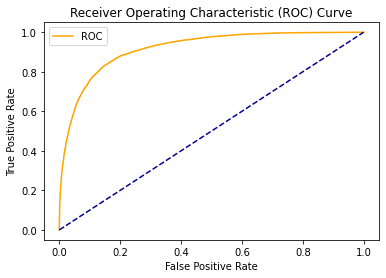

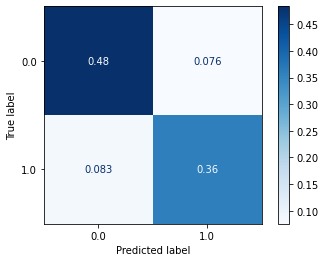

In [28]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 10,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.8851525519051413
ROC Area under Curve = 0.8862811565652333
Cohen's Kappa = 0.7683295104014137
Time taken = 41.2068190574646
              precision    recall  f1-score   support

         0.0    0.91432   0.87673   0.89513     23858
         1.0    0.85144   0.89583   0.87307     18816

    accuracy                        0.88515     42674
   macro avg    0.88288   0.88628   0.88410     42674
weighted avg    0.88660   0.88515   0.88541     42674



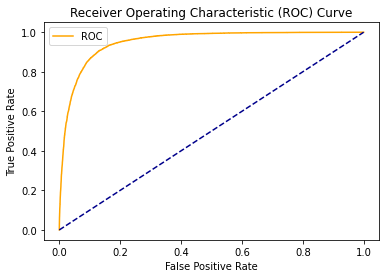

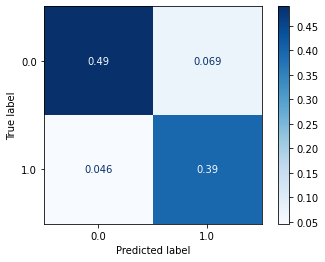

In [29]:
import catboost as cb
params_cb ={'iterations': 10,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

Accuracy = 0.9027276561840933
ROC Area under Curve = 0.9028246770824602
Cohen's Kappa = 0.8032810453595953
Time taken = 9.201464176177979
              precision    recall  f1-score   support

         0.0    0.92230   0.90200   0.91204     23858
         1.0    0.87912   0.90365   0.89121     18816

    accuracy                        0.90273     42674
   macro avg    0.90071   0.90282   0.90163     42674
weighted avg    0.90326   0.90273   0.90286     42674



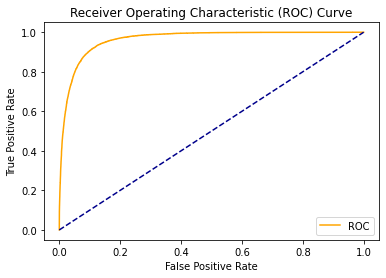

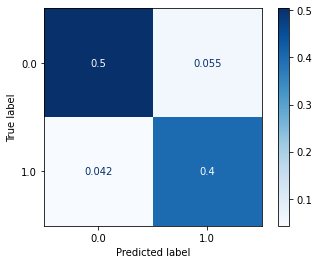

In [30]:
import xgboost as xgb
params_xgb ={'n_estimators': 50,
            'max_depth': 10}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

Accuracy = 0.9235131461780006
ROC Area under Curve = 0.9258840050763786
Cohen's Kappa = 0.8459248418272115
Time taken = 36.36959791183472
              precision    recall  f1-score   support

         0.0    0.95506   0.90582   0.92979     23858
         1.0    0.88791   0.94595   0.91601     18816

    accuracy                        0.92351     42674
   macro avg    0.92148   0.92588   0.92290     42674
weighted avg    0.92545   0.92351   0.92371     42674



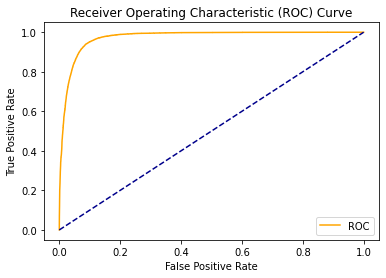

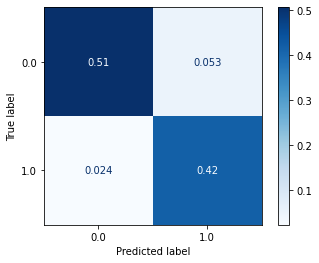

In [31]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 30, 
         'min_split_gain': 0.1, 
         'n_estimators': 8000, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

In [32]:
Accuracy=[accuracy_lr,accuracy_dt,accuracy_rf,accuracy_cb,accuracy_xgb,accuracy_lgb]

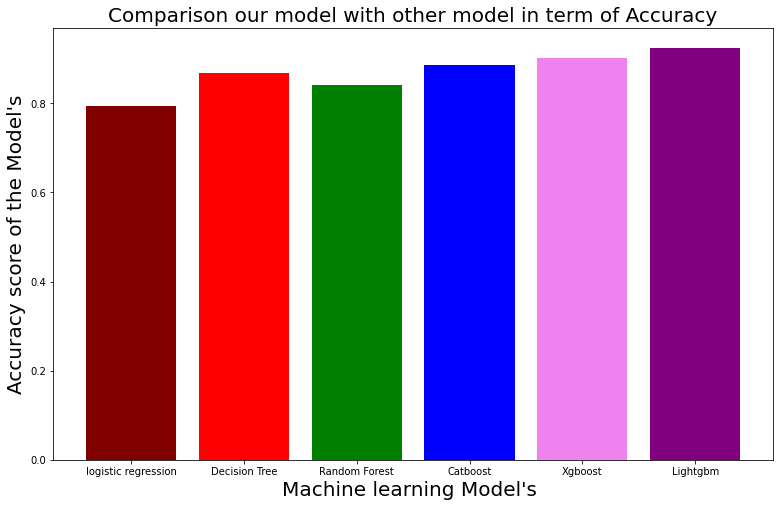

In [33]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model= ['logistic regression', 'Decision Tree', 'Random Forest', 'Catboost', 'Xgboost','Lightgbm']
ax.bar(model,Accuracy,color =['maroon','red','green','blue','violet','purple'])
plt.xlabel("Machine learning Model's ",fontsize=20)
plt.ylabel("Accuracy score of the Model's",fontsize=20)
plt.title("Comparison our model with other model in term of Accuracy",fontsize=20)
plt.show()

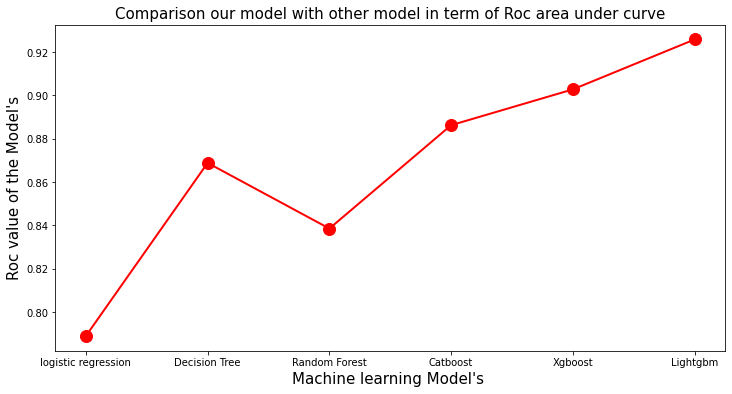

In [34]:
name = ['lr','DT','RF','Cb','Xgb','Lgb']
roc = [roc_auc_lr,roc_auc_dt,roc_auc_rf,roc_auc_cb,roc_auc_xgb,roc_auc_lgb]
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Machine learning Model's ",fontsize=15)
plt.ylabel("Roc value of the Model's",fontsize=15)
plt.title("Comparison our model with other model in term of Roc area under curve",fontsize=15)
plt.plot(model,roc,linestyle = '-', marker = 'o', label ='name', color ='Red',linewidth=2,markersize=12)
plt.show()

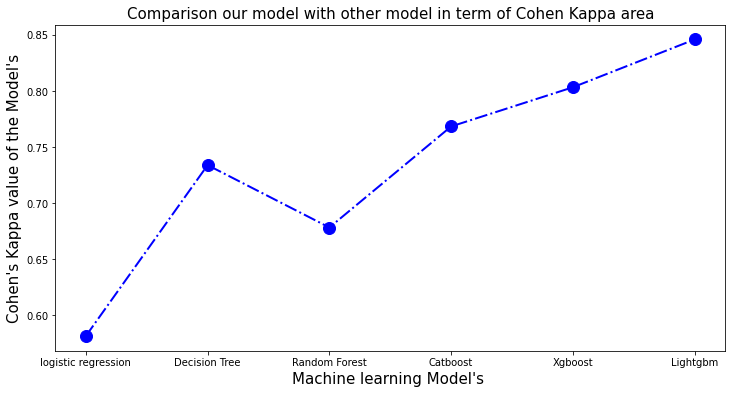

In [35]:
kappa =[coh_kap_lr,coh_kap_dt,coh_kap_rf,coh_kap_cb,coh_kap_xgb,coh_kap_lgb]
plt.rcParams["figure.figsize"] = (12,6)
plt.xlabel("Machine learning Model's ",fontsize=15)
plt.ylabel("Cohen's Kappa value of the Model's",fontsize=15)
plt.title("Comparison our model with other model in term of Cohen Kappa area",fontsize=15)
plt.plot(model,kappa,linestyle = '-.', marker = 'o', label ='name', color ='Blue',linewidth=2,markersize=12)
plt.show()